#Dataset Extraction & Setup

In [2]:
# Import necessary libraries
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Define paths
ZIP_PATH = "/content/archive.zip"  # Update if necessary
EXTRACT_PATH = "/content/dataset"

# Extract dataset if needed
if not os.path.exists(EXTRACT_PATH):
    print("Extracting dataset...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall("/content/")

# Define class folders
SHIP_DIR = os.path.join(EXTRACT_PATH, "ship")
NO_SHIP_DIR = os.path.join(EXTRACT_PATH, "no-ship")

# Verify extraction
print("Contents of dataset directory:", os.listdir(EXTRACT_PATH))


Contents of dataset directory: ['no-ship', 'ship']


#Basic Statistics & Class Distribution

Total ship images: 1000
Total no-ship images: 3000


<ipython-input-3-f748da52bbe5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Count'], palette="coolwarm")


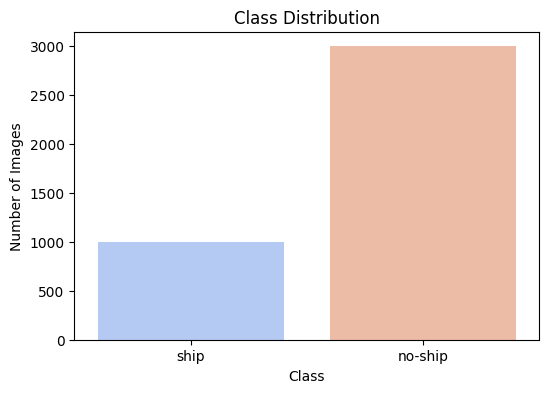

In [3]:
# Check total images per class safely
ship_images = os.listdir(SHIP_DIR) if os.path.exists(SHIP_DIR) else []
no_ship_images = os.listdir(NO_SHIP_DIR) if os.path.exists(NO_SHIP_DIR) else []

print(f"Total ship images: {len(ship_images)}")
print(f"Total no-ship images: {len(no_ship_images)}")

# Create a DataFrame for class distribution
class_counts = {'ship': len(ship_images), 'no-ship': len(no_ship_images)}
df = pd.DataFrame(list(class_counts.items()), columns=['Class Label', 'Count'])
df.set_index('Class Label', inplace=True)

# 📊 Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df.index, y=df['Count'], palette="coolwarm")
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()


#Visualizing Sample Images

📌 Sample images for 'ship':


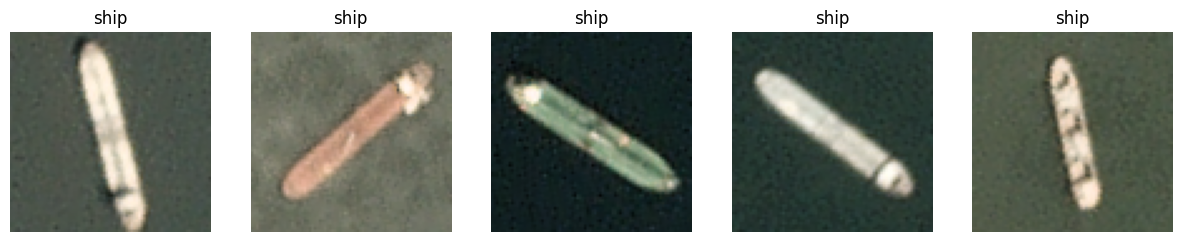

📌 Sample images for 'no-ship':


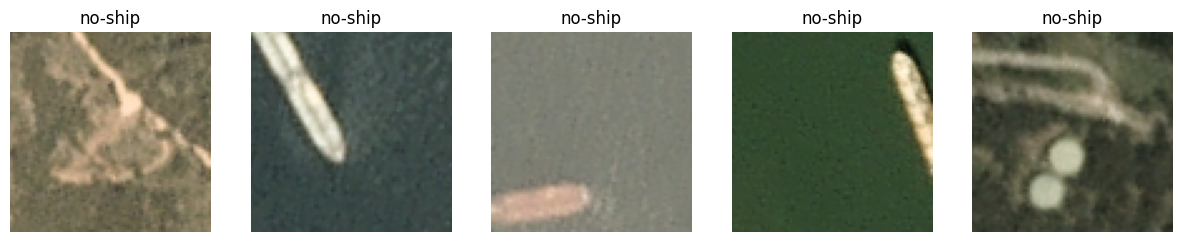

In [4]:
def show_random_images(class_dir, class_label, num_images=5):
    """Displays random images from a given directory."""
    if not os.path.exists(class_dir) or len(os.listdir(class_dir)) == 0:
        print(f"No images found in {class_label} directory.")
        return

    images = random.sample(os.listdir(class_dir), min(num_images, len(os.listdir(class_dir))))
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for img_name, ax in zip(images, axes):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(class_label)
            ax.axis("off")
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

    plt.show()

print("📌 Sample images for 'ship':")
show_random_images(SHIP_DIR, "ship")

print("📌 Sample images for 'no-ship':")
show_random_images(NO_SHIP_DIR, "no-ship")


# Image Size Distribution

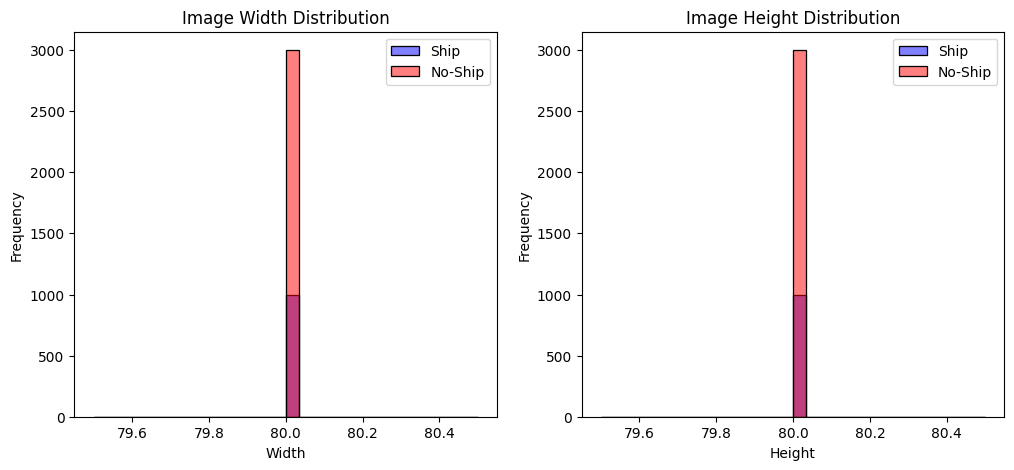

In [5]:
def get_image_sizes(class_dir):
    """Gets image dimensions (width, height) for all images."""
    sizes = []
    if not os.path.exists(class_dir):
        return sizes

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            sizes.append(img.size)  # (width, height)
        except:
            continue
    return sizes

ship_sizes = get_image_sizes(SHIP_DIR)
no_ship_sizes = get_image_sizes(NO_SHIP_DIR)

# Convert to DataFrame for visualization
ship_sizes_df = pd.DataFrame(ship_sizes, columns=['Width', 'Height'])
no_ship_sizes_df = pd.DataFrame(no_ship_sizes, columns=['Width', 'Height'])

plt.figure(figsize=(12, 5))

# Histogram of image widths
plt.subplot(1, 2, 1)
sns.histplot(ship_sizes_df['Width'], bins=30, kde=True, color="blue", label="Ship")
sns.histplot(no_ship_sizes_df['Width'], bins=30, kde=True, color="red", label="No-Ship")
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.legend()

# Histogram of image heights
plt.subplot(1, 2, 2)
sns.histplot(ship_sizes_df['Height'], bins=30, kde=True, color="blue", label="Ship")
sns.histplot(no_ship_sizes_df['Height'], bins=30, kde=True, color="red", label="No-Ship")
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.legend()

plt.show()


#RGB Color Distribution

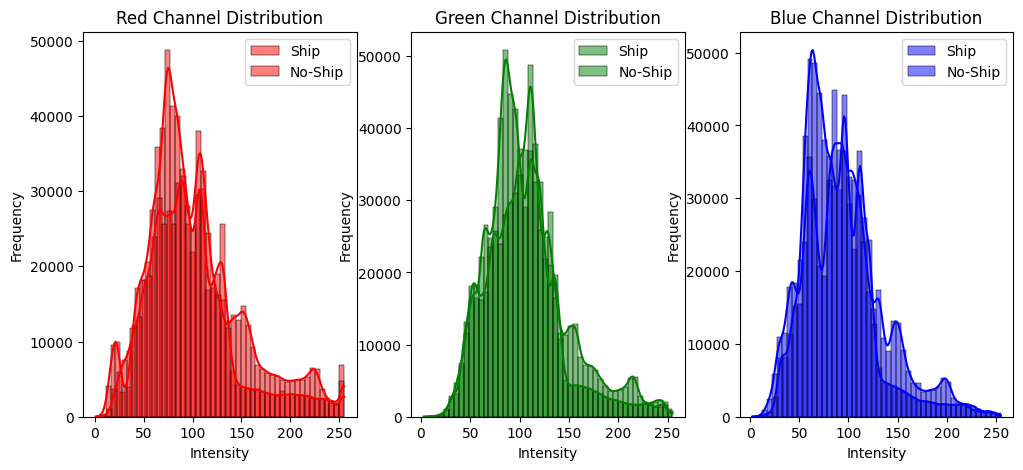

In [7]:
def get_color_distribution(class_dir, num_samples=100):
    """Extracts RGB color intensity distributions for images."""
    r_values, g_values, b_values = [], [], []

    sample_images = random.sample(os.listdir(class_dir), min(num_samples, len(os.listdir(class_dir))))

    for img_name in sample_images:
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            img_array = np.array(img)

            r_values.extend(img_array[:,:,0].flatten())  # Red channel
            g_values.extend(img_array[:,:,1].flatten())  # Green channel
            b_values.extend(img_array[:,:,2].flatten())  # Blue channel
        except:
            continue

    return r_values, g_values, b_values

ship_r, ship_g, ship_b = get_color_distribution(SHIP_DIR)
no_ship_r, no_ship_g, no_ship_b = get_color_distribution(NO_SHIP_DIR)

# Plot RGB distributions
plt.figure(figsize=(12, 5))

colors = ['red', 'green', 'blue']
labels = ['Red', 'Green', 'Blue']

for i, (ship_vals, no_ship_vals, color, label) in enumerate(zip([ship_r, ship_g, ship_b], [no_ship_r, no_ship_g, no_ship_b], colors, labels)):
    plt.subplot(1, 3, i+1)
    sns.histplot(ship_vals, bins=50, color=color, label="Ship", kde=True)
    sns.histplot(no_ship_vals, bins=50, color=color, alpha=0.5, label="No-Ship", kde=True)
    plt.title(f"{label} Channel Distribution")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.legend()

plt.show()


#Edge Detection Visualization

📌 Edge detection for 'ship' images:


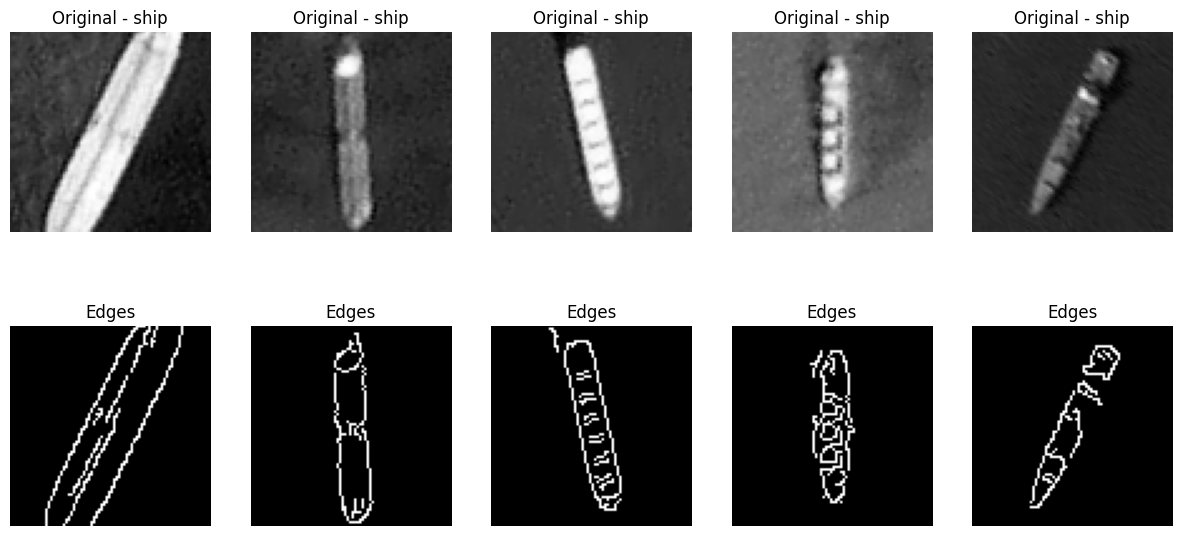

📌 Edge detection for 'no-ship' images:


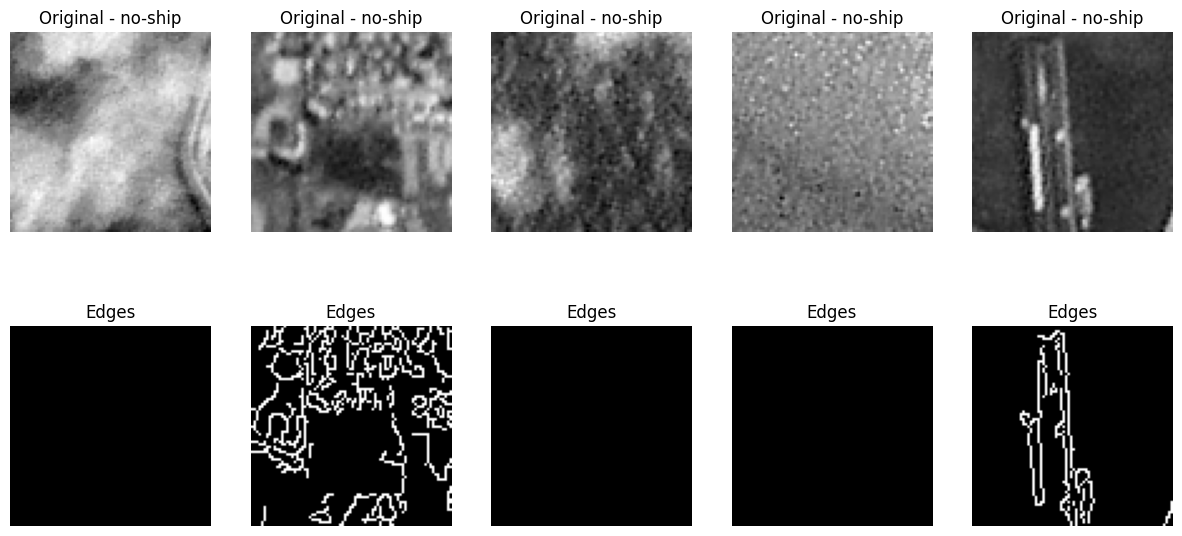

In [8]:
import cv2

def show_edge_detection(class_dir, class_label, num_images=5):
    """Applies Canny edge detection on sample images and displays results."""
    if not os.path.exists(class_dir) or len(os.listdir(class_dir)) == 0:
        print(f"No images found in {class_label} directory.")
        return

    images = random.sample(os.listdir(class_dir), min(num_images, len(os.listdir(class_dir))))
    fig, axes = plt.subplots(2, len(images), figsize=(15, 7))

    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            edges = cv2.Canny(img, 100, 200)  # Apply Canny edge detection

            # Original Image
            axes[0, i].imshow(img, cmap='gray')
            axes[0, i].set_title(f"Original - {class_label}")
            axes[0, i].axis("off")

            # Edge-detected Image
            axes[1, i].imshow(edges, cmap='gray')
            axes[1, i].set_title("Edges")
            axes[1, i].axis("off")

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

    plt.show()

print("📌 Edge detection for 'ship' images:")
show_edge_detection(SHIP_DIR, "ship")

print("📌 Edge detection for 'no-ship' images:")
show_edge_detection(NO_SHIP_DIR, "no-ship")


#Image Brightness Distribution

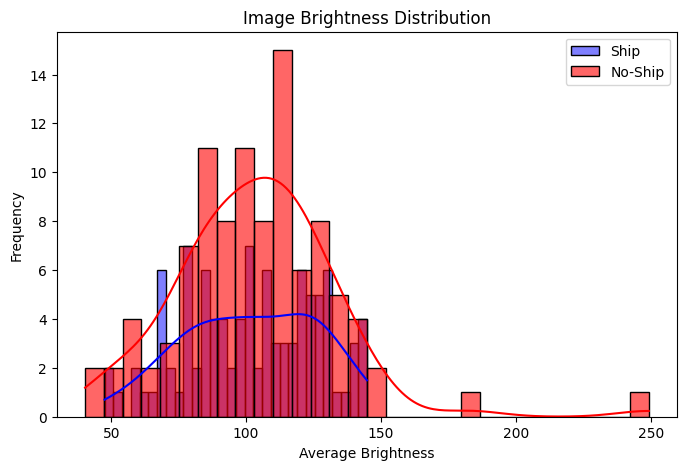

In [9]:
def compute_brightness(class_dir, num_samples=100):
    """Computes the average brightness of images in a given directory."""
    brightness_values = []

    if not os.path.exists(class_dir) or len(os.listdir(class_dir)) == 0:
        return []

    sample_images = random.sample(os.listdir(class_dir), min(num_samples, len(os.listdir(class_dir))))

    for img_name in sample_images:
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            brightness_values.append(np.array(img).mean())  # Compute average brightness
        except:
            continue

    return brightness_values

ship_brightness = compute_brightness(SHIP_DIR)
no_ship_brightness = compute_brightness(NO_SHIP_DIR)

# 📊 Plot Brightness Distribution
plt.figure(figsize=(8, 5))
sns.histplot(ship_brightness, bins=30, kde=True, color="blue", label="Ship")
sns.histplot(no_ship_brightness, bins=30, kde=True, color="red", label="No-Ship", alpha=0.6)
plt.title("Image Brightness Distribution")
plt.xlabel("Average Brightness")
plt.ylabel("Frequency")
plt.legend()
plt.show()
